Assignment 1: Employee Attrition Prediction
Objective:
Predict whether an employee is likely to leave a company based on HR data.
Dataset:
Use the IBM HR Analytics Employee Attrition Dataset from Kaggle.
Tasks:
1. Load the dataset and clean missing/null data if present.
2. Encode categorical features (e.g., Gender, JobRole, OverTime).
3. Train a RandomForestClassifier to predict Attrition (Yes/No).
4. Evaluate with:
o Confusion Matrix
o Classification Report (Precision, Recall, F1)
o Feature Importance Plot

🗂️ 1. Load and Clean Data


In [1]:
import pandas as pd

# Load the dataset (ensure you downloaded from Kaggle and provided the correct path)
df = pd.read_csv('/content/drive/MyDrive/mi_py_BCT/ml_using_py_BCT/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Check for missing values
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

If there are missing values, handle them like:

python
Copy
Edit
# Example
df.dropna(inplace=True)  # or use fillna()

🔤 2. Encode Categorical Features

In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode all object-type columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)


🌳 3. Train Random Forest Model

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

📊 4. Evaluation

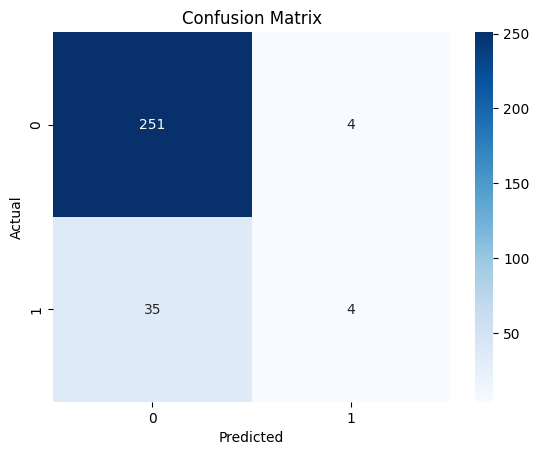

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


🔍 5. Feature Importance

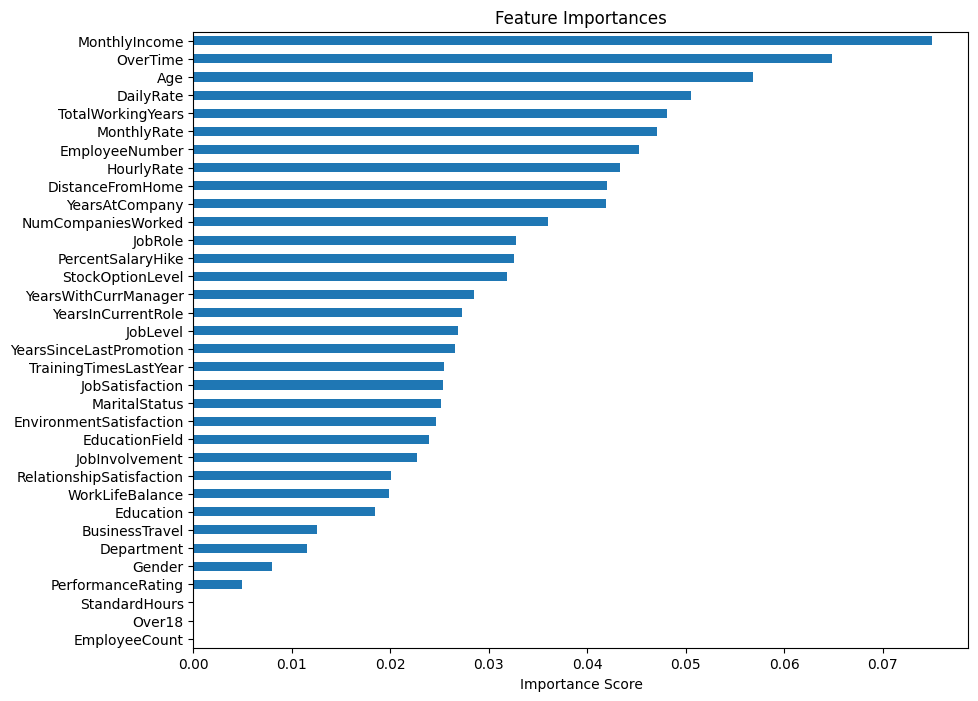

In [5]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.show()


Assignment 2: Predict Car Prices with Random Forest Regressor
Objective:
Estimate car prices based on various features like brand, mileage, engine power, etc.
Dataset:
Use the Car Dekho Dataset from Kaggle.
Tasks:
1. Preprocess data (handle missing values, encode categorical variables).
2. Split the dataset into training and testing sets.
3. Train a RandomForestRegressor to predict Selling_Price.
4. Evaluate with:
o Mean Squared Error (MSE)
o R² Score
5. Visualize actual vs. predicted price using a scatter plot.

🗂️ 1. Load and Preprocess Dataset

In [7]:
df = pd.read_csv("/content/drive/MyDrive/mi_py_BCT/ml_using_py_BCT/cardekho_dataset.csv")  # Adjust path

# Check missing values
print(df.isnull().sum())

# Drop/Impute as needed
df.dropna(inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)


Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


✂️ 2. Split Dataset

In [10]:
from sklearn.model_selection import train_test_split

# Inspect the dataframe columns to find the correct target variable name
# print(df.columns) # Uncomment this line to see the column names

# Assuming the correct column name is 'selling_price' based on the assignment description
X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🌲 3. Train RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

🧮 4. Evaluation
python
Copy
Edit


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 47063965936.56
R² Score: 0.94



📈 5. Scatter Plot: Actual vs Predicted

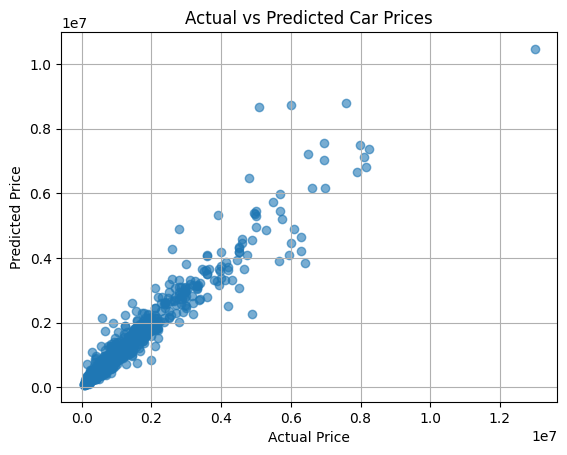

In [13]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
